<a href="https://colab.research.google.com/github/TranNgocXuanThanh/10monanvietnam/blob/main/10monanvietnam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/10monanvietnam/'

photos, labels = list(), list()

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('pho'):
        output = 0
    if file.startswith('nuixaobo'):
        output = 1
    if file.startswith('mixaobo'):
        output = 2
    if file.startswith('xoi'):
        output = 3
    if file.startswith('bunbo'):
        output = 4
    if file.startswith('bundaumamtom'):
        output = 5
    if file.startswith('banhcuon'):
        output = 6
    if file.startswith('bunthitnuong'):
        output = 7
    if file.startswith('banhbeo'):
        output = 8
    if file.startswith('che'):
        output = 9

    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,18)

# Save photos and labels to disk
save('/content/drive/MyDrive/10monanvietnam', photos)
save('/content/drive/MyDrive/10monanvietnam', labels)

# Define the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=60, epochs=30, verbose=1)

model.evaluate(photos,labels)

Epoch 1/30
2/2 [==============================] - 1s 82ms/step - loss: 9.0943 - accuracy: 0.0882
Epoch 2/30
2/2 [==============================] - 1s 85ms/step - loss: 14.8851 - accuracy: 0.2059
Epoch 3/30
2/2 [==============================] - 1s 82ms/step - loss: 2.6920 - accuracy: 0.1324
Epoch 4/30
2/2 [==============================] - 1s 82ms/step - loss: 2.7010 - accuracy: 0.1324
Epoch 5/30
2/2 [==============================] - 1s 84ms/step - loss: 2.5173 - accuracy: 0.1912
Epoch 6/30
2/2 [==============================] - 1s 80ms/step - loss: 2.5659 - accuracy: 0.1029
Epoch 7/30
2/2 [==============================] - 1s 80ms/step - loss: 2.5524 - accuracy: 0.0882
Epoch 8/30
2/2 [==============================] - 1s 80ms/step - loss: 2.4388 - accuracy: 0.1471
Epoch 9/30
2/2 [==============================] - 1s 79ms/step - loss: 2.5695 - accuracy: 0.1176
Epoch 10/30
2/2 [==============================] - 1s 79ms/step - loss: 2.4714 - accuracy: 0.1324
Epoch 11/30
2/2 [===========

3/3 [==============================] - 0s 44ms/step - loss: 0.5034 - accuracy: 0.8824


[0.5034023523330688, 0.8823529481887817]

In [7]:
model.save('10monanvietnam.h5')

In [8]:
classes = ['pho','mixaobo','nuixaobo','xoi','che','bunbo','bundaumamtom','bunthitnuong','banhcuon','comtam']

1/1 [==============================] - 0s 19ms/step
[[2.7402798e-02 2.7396300e-01 1.4429764e-01 9.6671134e-03 2.0382337e-02
  1.1341873e-01 9.2792176e-03 3.8818687e-01 7.5781550e-03 2.8388062e-04
  1.3946959e-04 3.3631523e-03 4.6604659e-04 5.3768401e-04 5.6983391e-04
  1.5590059e-04 4.7413188e-05 2.6078810e-04]]


'bunthitnuong'

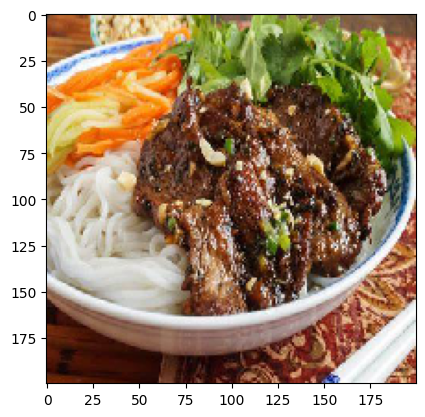

In [35]:
img = load_img('/content/drive/MyDrive/10monanvietnam/bunthitnuong.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]